# Covid-19 Data Wrangling in Python

## Fatality statistics and ranks among countries

In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

print('seaborn version: ', sns.__version__)
print('matplotlib version: ', matplotlib.__version__)
print('pandas version: ', pd.__version__)
print('numpy version: ', np.version.version)

seaborn version:  0.10.0
matplotlib version:  3.1.3
pandas version:  1.0.3
numpy version:  1.18.1


In [2]:
dateStr = '2020-04-14'

covid_daily_df = pd.read_csv("data/{}.csv".format(dateStr))

covid_daily_df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-14 23:33:31,34.223334,-82.461707,9,0,0,9,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-14 23:33:31,30.295065,-92.414197,104,5,0,99,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-14 23:33:31,37.767072,-75.632346,15,0,0,15,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-14 23:33:31,43.452658,-116.241552,538,9,0,529,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-14 23:33:31,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [3]:
covid_daily_df.shape

(3014, 12)

In [4]:
# show all unique Country_Region codes

countries = covid_daily_df.Country_Region.unique()
print(countries)
len(countries)

['US' 'Canada' 'United Kingdom' 'China' 'Netherlands' 'Australia'
 'Denmark' 'France' 'Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Central African Republic' 'Chad' 'Chile'
 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Diamond Princess'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Holy See' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'It

185

In [5]:
# construct a dataframe with five columns: 
# Country_Region (index), Confirmed, Deaths, Recovered, Active
df_country_cases = covid_daily_df.groupby('Country_Region').agg({'Confirmed': np.sum, 'Deaths': np.sum, 'Recovered': np.sum, 'Active': np.sum})

df_country_cases

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,714,23,40,651
Albania,475,24,248,203
Algeria,2070,326,691,1053
Andorra,659,31,128,500
Angola,19,2,5,12
...,...,...,...,...
West Bank and Gaza,308,2,62,244
Western Sahara,6,0,0,6
Yemen,1,0,0,1


## Statistics about ranks of confirmed cases and deaths

In [57]:
# sort the dataframe by confirmed cases, descending
_confirmed = df_country_cases.sort_values(by = 'Confirmed', ascending = False).reset_index()

df_confirmed_main = _confirmed.iloc[0:10, [0,1]]
df_pie_1 = df_confirmed_main.append({
    'Country_Region': 'The Rest',
    'Confirmed': sum(_confirmed.Confirmed[11:])}, ignore_index = True)
df_pie_1

,Country_Region,Confirmed
0,US,607670
1,Spain,172541
2,Italy,162488
3,France,131361
4,Germany,131359
5,United Kingdom,94845
6,China,83306
7,Iran,74877
8,Turkey,65111
9,Belgium,31119


In [59]:
# sort the dataframe by deaths, descending
_deaths = df_country_cases.sort_values(by = 'Deaths', ascending = False).reset_index()

df_deaths_main = _deaths.iloc[0:10, [0,2]]
df_pie_2 = df_deaths_main.append({
    'Country_Region': 'The Rest',
    'Deaths': sum(_deaths.Deaths[11:])}, ignore_index = True)
df_pie_2

,Country_Region,Deaths
0,US,25832
1,Italy,21067
2,Spain,18056
3,France,15748
4,United Kingdom,12129
5,Iran,4683
6,Belgium,4157
7,China,3345
8,Germany,3294
9,Netherlands,2955


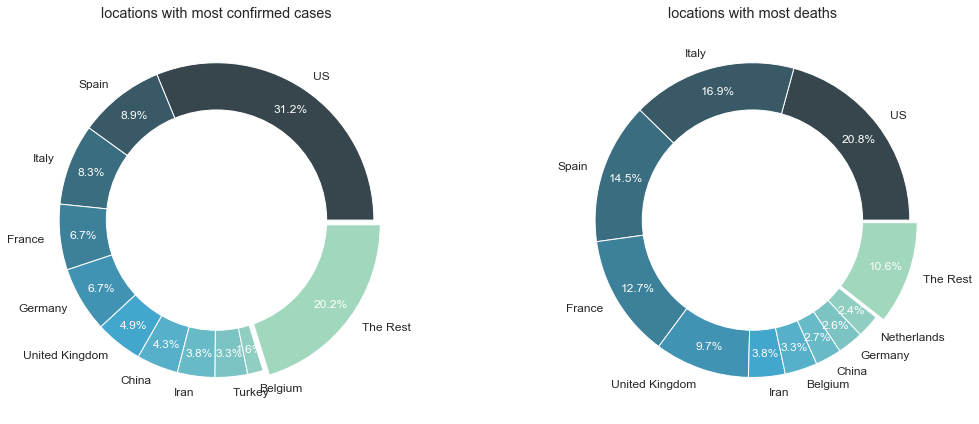

In [101]:
# make the pie plots of the confirmed cases and deaths

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

expl = np.zeros(10)
explode = np.append(expl, 0.05)

colors = sns.color_palette("GnBu_d", len(df_pie_1))
textprops = { 'fontsize': 12 }

# ax1 for pie chart of confirmed cases
patches1, texts1, autotexts1 = ax1.pie(df_pie_1.Confirmed, labels = df_pie_1.Country_Region, autopct = '%1.1f%%', pctdistance = 0.85, colors = colors, explode = explode, textprops = textprops)
ax1.set_title('locations with most confirmed cases', size = 'x-large')

# ax2 for pie chart of deaths
patches2, texts2, autotexts2 = ax2.pie(df_pie_2.Deaths, labels = df_pie_2.Country_Region, autopct = '%1.1f%%', pctdistance = 0.85, colors = colors, explode = explode, textprops = textprops)
ax2.set_title('locations with most deaths', size = 'x-large')

# add white centre disk to both pies
for ax in fig.axes:
    centre_disk = plt.Circle((0,0), 0.70, fc='white')
    ax.add_artist(centre_disk)


# ===================== Cosmetics =====================

# add white centre disk to both pies
for ax in fig.axes:
    centre_disk = plt.Circle((0,0), 0.70, fc='white')
    ax.add_artist(centre_disk)

# chage the percentage text to white
for (t1, t2) in zip(autotexts1, autotexts2):
    t1.set_color('white')
    t2.set_color('white')

plt.tight_layout()
plt.savefig("images/pie_confirmed_{}-dpi-200.jpg".format(dateStr), format="jpg", dpi = 200)
# plt.savefig("images/pie_confirmed_{}-dpi-300.jpg".format(dateStr), format="jpg", dpi = 300)
plt.savefig("images/pie_confirmed_{}.svg".format(dateStr), format="svg")
plt.show()

## Statistics about case fatality rates

In [7]:
# All countries in this csv file have confirmed cases. 
# now we can calculate the fatality rate

df_country_cases['fatality_rate'] = df_country_cases.Deaths / df_country_cases.Confirmed * 100

fatalities = df_country_cases.query('(Deaths > 0) & (Confirmed > 50)') \
                            .sort_values(by = 'fatality_rate', ascending = False)

fatalities['location'] = fatalities.index

fatalities[:25]

,Confirmed,Deaths,Recovered,Active,fatality_rate,location
Country_Region,,,,,,
Algeria,2070,326,691,1053,15.748792,Algeria
Belgium,31119,4157,6868,20094,13.358398,Belgium
Italy,162488,21067,37130,104291,12.965265,Italy
United Kingdom,94845,12129,323,82393,12.788233,United Kingdom
France,131361,15748,29098,86515,11.988337,France
Netherlands,27580,2955,297,24328,10.714286,Netherlands
Spain,172541,18056,67504,86981,10.464759,Spain
Liberia,59,6,4,49,10.169492,Liberia
San Marino,371,36,53,282,9.703504,San Marino


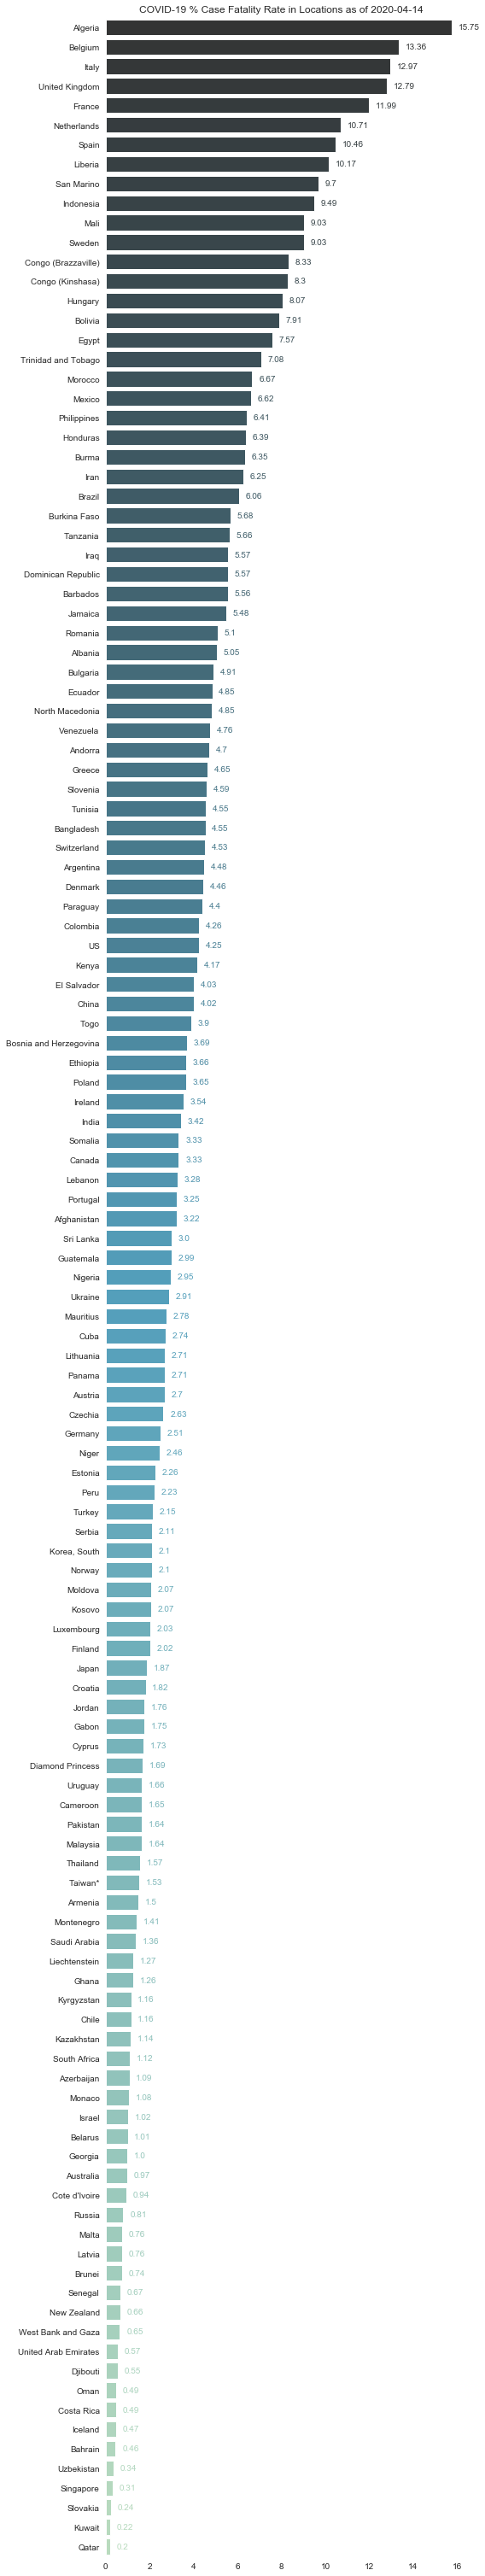

In [8]:
# plot the rank of fatality rate as horizontal bar chart

# canvas style must come first
sns.set_style("white")

# set color palette
pal = sns.color_palette("GnBu_d", len(fatalities))

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 42))

# plot the rank of fatality rate
g = sns.barplot(x = 'fatality_rate', y = 'location', 
            data = fatalities, label = 'Fatality Rate', palette = pal)

# add fatality rate to each bar
#for index, row in fatalities.iterrows():
#    g.text(row.name, row.tip, round(row.fatality_rate, 2), color='black', ha="left")

# here each patch in ax.patches is a matplotlib.patches.Rectangle object
for p in ax.patches:
    _x = p.get_x() + p.get_width() + float(0.3)
    _y = p.get_y() + p.get_height() - float(0.4)
    value = round(p.get_width(), 2)
    ax.text(_x, _y, value, ha = "left", va = "center", color = p.get_facecolor())

# Add informative axis label
ax.set(xlim=(0, 16), ylabel = '', xlabel = '')

# cosmetics
sns.despine(left=True, bottom=True)

plt.title('COVID-19 % Case Fatality Rate in Locations as of {}'.format(dateStr))
plt.tight_layout()
plt.savefig("images/rank_fatalitiy-rate_{}-dpi-200.jpg".format(dateStr), format="jpg", dpi = 200)
# plt.savefig("images/rank_fatalitiy-rate_{}-dpi-300.jpg".format(dateStr), format="jpg", dpi = 300)
plt.savefig("images/rank_fatalitiy-rate_{}.svg".format(dateStr), format="svg")
plt.show()

In [9]:
fatalities_asc = df_country_cases.query('(Deaths > 0) & (Confirmed > 50)').sort_values(by = 'fatality_rate', ascending = True)

fatalities_asc[:25]

,Confirmed,Deaths,Recovered,Active,fatality_rate
Country_Region,,,,,
Qatar,3428,7,373,3048,0.204201
Kuwait,1355,3,176,1176,0.221402
Slovakia,835,2,113,720,0.239521
Singapore,3252,10,611,2631,0.307503
Uzbekistan,1165,4,99,1062,0.343348
Bahrain,1528,7,645,876,0.458115
Iceland,1720,8,989,723,0.465116
Costa Rica,618,3,66,549,0.485437
Oman,813,4,130,679,0.492005


In [10]:
df_country_cases.Deaths.sum()

125985

In [11]:
# fatalitiy over all countries having more than 50 confirmed cases. 

fatality_partial = fatalities.Deaths.sum() / fatalities.Confirmed.sum()

fatality_partial

0.06379043981704259

In [12]:
# fatalitiy over all countries, regardless of how many confirmed cases and deaths. 

fatality_overall = df_country_cases.Deaths.sum() / df_country_cases.Confirmed.sum()

fatality_overall

0.06375139662542911

In [13]:
# define a function which returns the rank of the fatality

indices = fatalities.sort_values(by = 'fatality_rate', ascending = False).index

def fatality_rank( country: str ) -> int:
    
    return indices.get_loc(country)


In [14]:
ranks_asc = fatalities.sort_values(by = 'fatality_rate', ascending = True).index

def get_fatality_and_rank(country: str) -> pd.Series:
    fatality = fatalities.loc[country].fatality_rate

    rank_asc = ranks_asc.get_loc(country) + 1
    rank_dsc = len(ranks_asc) - rank_asc + 1

    return pd.Series({'Country_Region': country, 'fatality_rate': fatality, 'rank_asc': rank_asc, 'rank_dsc': rank_dsc})


In [15]:
# test the function get_fatality_and_rank

get_fatality_and_rank('Italy')

Country_Region      Italy
fatality_rate     12.9653
rank_asc              128
rank_dsc                3
dtype: object

In [36]:
# how do these countries score in the fatality_rate?

cols = ['Country_Region', 'fatality_rate', 'rank_asc', 'rank_dsc']
countries = ['Algeria', 'Australia', 'Austria', 'China', 'Germany', 'Italy', 'New Zealand', 'Qatar', 'Singapore', 'US']

df_fatality_scores = pd.DataFrame(columns = cols)

for country in countries:
    df_fatality_scores = df_fatality_scores.append(get_fatality_and_rank(country), ignore_index=True)

df_fatality_scores

,Country_Region,fatality_rate,rank_asc,rank_dsc
0,Algeria,15.748792,130,1
1,Australia,0.966485,20,111
2,Austria,2.699283,60,71
3,China,4.015317,80,51
4,Germany,2.507632,58,73
5,Italy,12.965265,128,3
6,New Zealand,0.658858,13,118
7,Qatar,0.204201,1,130
8,Singapore,0.307503,4,127
9,US,4.250991,83,48


In [17]:
# basic statistics of the fatality
fatalities.fatality_rate.describe()

count    130.000000
mean       3.790773
std        3.180506
min        0.204201
25%        1.434954
50%        2.927674
75%        5.016683
max       15.748792
Name: fatality_rate, dtype: float64

In [18]:
# median and mode of fatality rate

fatality_median = fatalities.fatality_rate.median()
fatality_mode = fatalities.fatality_rate.mode()

print("Fatality median is {} and mode is {}".format(fatality_median, fatality_mode))


Fatality median is 2.9276743660932647 and mode is 0       0.204201
1       0.221402
2       0.239521
3       0.307503
4       0.343348
         ...    
125    11.988337
126    12.788233
127    12.965265
128    13.358398
129    15.748792
Length: 130, dtype: float64


In [19]:
# the mode above does not make sense, let's fix it.

# first, segment and sort fatality values into bins
bins = 10

df_bins = pd.cut(fatalities_asc.fatality_rate, bins, include_lowest=True)

fatalities_asc['fatality_bin'] = df_bins.values

df_counts = fatalities_asc.groupby('fatality_bin', as_index = False).count()

df_counts

# I'd like to see the content of each bin, what to do?

,fatality_bin,Confirmed,Deaths,Recovered,Active,fatality_rate
0,"(0.188, 1.759]",43,43,43,43,43
1,"(1.759, 3.313]",28,28,28,28,28
2,"(3.313, 4.868]",25,25,25,25,25
3,"(4.868, 6.422]",14,14,14,14,14
4,"(6.422, 7.976]",5,5,5,5,5
5,"(7.976, 9.531]",6,6,6,6,6
6,"(9.531, 11.085]",4,4,4,4,4
7,"(11.085, 12.64]",1,1,1,1,1
8,"(12.64, 14.194]",3,3,3,3,3
9,"(14.194, 15.749]",1,1,1,1,1


## Histogram of Case Fatality Rate 

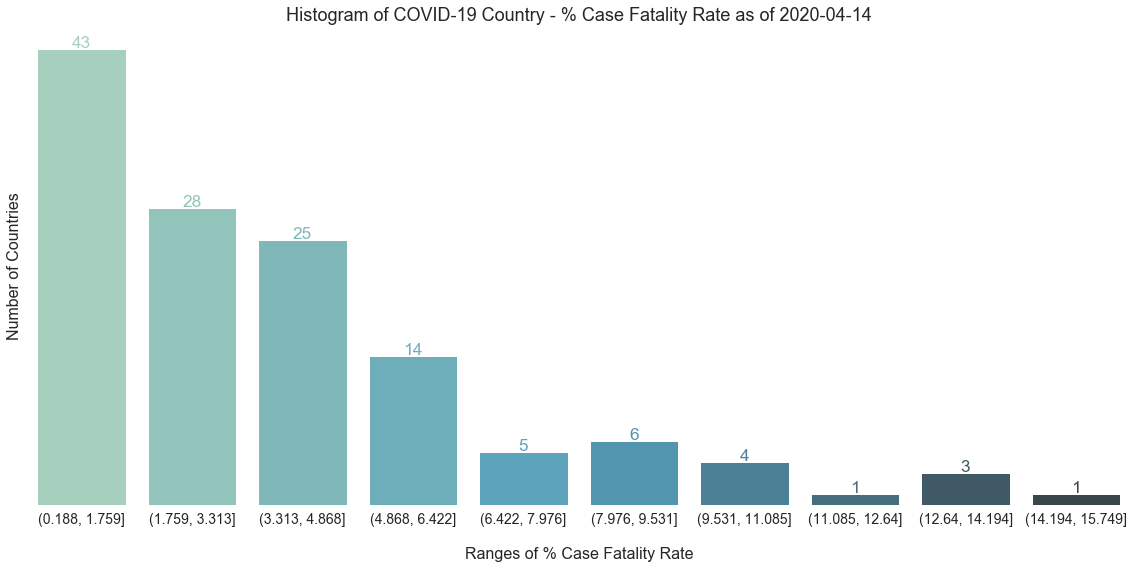

In [52]:
# plot the histogram of fatality rates as count plot

# canvas style must come first
sns.set_style("white")

# set color palette
# the syntax [::-1] means reverse the order in the palette
pal = sns.color_palette("GnBu_d", bins)[::-1]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 8))

# set the title of the plot
plt.title('Histogram of COVID-19 Country - % Case Fatality Rate as of {}'.format(dateStr),
         size = 18)
# set the font size of axis
plt.rcParams["axes.labelsize"] = 16

# plot the count plot
g = sns.countplot(x = 'fatality_bin', data = fatalities_asc, palette = pal)

# add count number to each bar
# here each patch in ax.patches is a matplotlib.patches.Rectangle object
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2 
    _y = p.get_y() + p.get_height() + float(0.6)
    value = p.get_height()
    ax.text(_x, _y, value, ha = "center", va = "center", 
            color = p.get_facecolor(), size = 'xx-large')


# ================= cosmetics ====================
# remove the frames
sns.despine(left=True, bottom=True)

# remove the value scale on y axis (ticks) and y label
g.set(yticks = [], ylabel = 'Number of Countries')

# set the x label
g.set(xlabel = 'Ranges of % Case Fatality Rate')
ax.xaxis.labelpad = 20

# set the x ticks
g.set_xticklabels(g.get_xticklabels(), size = 14)

plt.tight_layout()


plt.savefig("images/countplot_location-case-fatality-rate_{}-dpi-200.jpg".format(dateStr), format="jpg", dpi = 200)
# plt.savefig("images/countplot_location-case-fatality-rate_{}-dpi-300.jpg".format(dateStr), format="jpg", dpi = 300)
plt.savefig("images/countplot_location-case-fatality-rate_{}.svg".format(dateStr), format="svg")

# plt.show() must appear last, otherwise it only shows a white canvas.
plt.show()


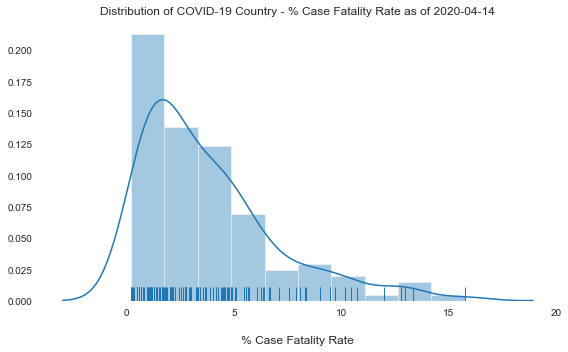

In [50]:
# set color palette
# the syntax [::-1] means reverse the order in the palette
pal = sns.color_palette("GnBu_d", bins)[::-1]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 5))

# set the title of the plot
plt.title('Distribution of COVID-19 Country - % Case Fatality Rate as of {}'.format(dateStr))

# set the font size of axis
plt.rcParams["axes.labelsize"] = 14

# do the distribution plot
g = sns.distplot(fatalities.fatality_rate, bins = bins, rug = True)

# cosmetics
sns.despine(left=True, bottom=True)

# set the x label
g.set(xlabel = '% Case Fatality Rate')
ax.xaxis.labelpad = 18

plt.tight_layout()


plt.savefig("images/histogram_location-case-fatality-rate_{}-dpi-200.jpg".format(dateStr), format="jpg", dpi = 200)
# plt.savefig("images/histogram_location-case-fatality-rate_{}-dpi-300.jpg".format(dateStr), format="jpg", dpi = 300)
plt.savefig("images/histogram_location-case-fatality-rate_{}.svg".format(dateStr), format="svg")

# plt.show() must appear last, otherwise it only shows a white canvas.
plt.show()


## Join Population data from United Nations 

Poplation is in thousand persons.  

In [23]:
population = pd.read_csv('data/WPP2019_TotalPopulationBySex.csv')
population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [24]:
# we only need the data of year 2020
pop2019 = population[population.Time == 2019]
pop2019.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
69,4,Afghanistan,2,Medium,2019,2019.5,19529.727,18512.030,38041.757,58.269
953,903,Africa,2,Medium,2019,2019.5,653513.680,654550.496,1308064.176,44.119
1837,1823,African Group,2,Medium,2019,2019.5,652644.714,653675.858,1306320.572,44.464
1988,1560,African Union,2,Medium,2019,2019.5,652949.469,653953.561,1306903.030,44.085
2139,2080,African Union: Central Africa,2,Medium,2019,2019.5,76945.498,77068.207,154013.705,29.192


In [25]:
len(pop2019)

477

### Now we need to unify the lation names of the population data and the corona data 

In [26]:
# The set of location names of the population data is much bigger than corona's. 
# So we first find out which country names are not in the population data

countryNames_covid19_only = df_country_cases[df_country_cases.index.isin(pop2019.Location) == False]

countryNames_covid19_only.index

Index(['Bolivia', 'Brunei', 'Burma', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Cote d'Ivoire', 'Diamond Princess', 'Iran', 'Korea, South', 'Kosovo',
       'Laos', 'MS Zaandam', 'Moldova', 'Russia', 'Syria', 'Taiwan*',
       'Tanzania', 'US', 'Venezuela', 'Vietnam', 'West Bank and Gaza'],
      dtype='object', name='Country_Region')

In [27]:
len(countryNames_covid19_only)

21

In [28]:
pop2019[pop2019.Location.str.contains('Pales')]

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
236754,275,State of Palestine,2,Medium,2019,2019.5,2526.35,2455.072,4981.422,827.479


In [29]:
pop2019.Location.replace({
    'Bolivia (Plurinational State of)':'Bolivia', 
    'Brunei Darussalam':'Brunei', 
    'Myanmar': 'Burma', 
    'Congo':'Congo (Brazzaville)', 
    'Democratic Republic of the Congo':'Congo (Kinshasa)', 
    'Côte d\'Ivoire':'Cote d\'Ivoire', 
    'Iran (Islamic Republic of)':'Iran', 
    'Republic of Korea':'Korea, South', 
    'Lao People\'s Democratic Republic':'Laos', 
    'Republic of Moldova':'Moldova', 
    'Russian Federation':'Russia', 
    'Syrian Arab Republic':'Syria', 
    'China, Taiwan Province of China':'Taiwan*', 
    'United Republic of Tanzania':'Tanzania', 
    'United States of America':'US', 
    'Venezuela (Bolivarian Republic of)':'Venezuela', 
    'Viet Nam':'Vietnam', 
    'State of Palestine':'West Bank and Gaza'}, inplace=True)

In [30]:
# drop unnecessary columns

df_pop2019 = pop2019.drop(columns=['LocID','VarID','Variant','Time','MidPeriod'])
df_pop2019.head()

,Location,PopMale,PopFemale,PopTotal,PopDensity
69,Afghanistan,19529.727,18512.030,38041.757,58.269
953,Africa,653513.680,654550.496,1308064.176,44.119
1837,African Group,652644.714,653675.858,1306320.572,44.464
1988,African Union,652949.469,653953.561,1306903.030,44.085
2139,African Union: Central Africa,76945.498,77068.207,154013.705,29.192


In [31]:
# now join the corona and population dataframes

df_covid19_pop2019 = pd.merge(df_country_cases, df_pop2019, how='inner', left_on='Country_Region', right_on='Location')
df_covid19_pop2019.head()

,Confirmed,Deaths,Recovered,Active,fatality_rate,Location,PopMale,PopFemale,PopTotal,PopDensity
0,714,23,40,651,3.221289,Afghanistan,19529.727,18512.030,38041.757,58.269
1,475,24,248,203,5.052632,Albania,1466.785,1414.128,2880.913,105.143
2,2070,326,691,1053,15.748792,Algeria,21749.666,21303.388,43053.054,18.076
3,659,31,128,500,4.704097,Andorra,NaN,NaN,77.146,164.140
4,19,2,5,12,10.526316,Angola,15744.779,16080.520,31825.299,25.528


In [32]:
df_covid19_pop2019.shape

(182, 10)

In [33]:
# correlation between fatality_rate and PopDensity??

corr_fatality_popDensity = df_covid19_pop2019.fatality_rate.corr(df_covid19_pop2019.PopDensity)
corr_fatality_popDensity

-0.07786170761332774

In [34]:
corr_confirmed_popTotal = df_covid19_pop2019.Confirmed.corr(df_covid19_pop2019.PopTotal)
corr_confirmed_popTotal

0.2346237374701147

In [35]:
corr_deaths_popTotal = df_covid19_pop2019.Deaths.corr(df_covid19_pop2019.PopTotal)
corr_deaths_popTotal

0.1630402211389456